<a href="https://colab.research.google.com/github/Gakpe/TBS_investment_management/blob/main/Assignment_1_Julien_GAKPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**art 1: Obtaining financial data [10 pt]**


In [ ]:
!pip install pandas 
!pip install numpy 
!pip install yfinance
!pip install quandl
!pip install ffn

import pandas as pd
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import ffn

url = "https://raw.githubusercontent.com/Gakpe/TBS_investment_management/main/1_labs_introduction/stock_prices_1.csv"


**Part 1: Obtaining financial data [10 pt]**


**Part 1.1.** Loading historical stock prices (6pt)

Using any Python financial data library (e.g. yfinance) download daily adjusted close prices for 5 U.S. stocks of your choice for the last 5 years and store them in a pandas DataFrame object named stock_prices. Only stocks that are current constituents of the S&P 500 should be considered.


In [ ]:
msft = yf.Ticker("MSFT")
aapl = yf.Ticker("AAPL")
googl = yf.Ticker("GOOGL")
tsla = yf.Ticker("TSLA")
fb = yf.Ticker("FB")
TB = yf.Ticker("US1M:U.S.")


tickers = "MSFT AAPL GOOGL TSLA FB"
stock_data = yf.download(tickers, start="2016-01-01", end="2020-12-31")

[*********************100%***********************]  5 of 5 completed


In [ ]:
data_adjusted = {'Apple': stock_data["Adj Close"].AAPL,
                'Microsoft': stock_data["Adj Close"].MSFT,
                'Google': stock_data["Adj Close"].GOOGL,
                'Tesla': stock_data["Adj Close"].TSLA,
                'Facebook': stock_data["Adj Close"].FB}
                
stock_prices = pd.DataFrame(data = data_adjusted )
stock_prices.head()

,Apple,Microsoft,Google,Tesla,Facebook
Date,,,,,
2016-01-04,24.364536,49.891834,759.440002,44.681999,102.220001
2016-01-05,23.753977,50.119446,761.530029,44.686001,102.730003
2016-01-06,23.289116,49.209011,759.330017,43.807999,102.970001
2016-01-07,22.306208,47.497398,741.000000,43.130001,97.919998
2016-01-08,22.424154,47.643063,730.909973,42.200001,97.330002


Part 1.2 : Obtaining data on risk-free asset (4pt)

Using a financial data library (e.g. yfinance) of your choice, obtain daily data on the U.S. risk-free (1-month Treasury Bill) rate for the last 5 years and store them in a pandas DataFrame object named rf.


In [ ]:
url2 = "https://raw.githubusercontent.com/Gakpe/TBS_investment_management/main/1_labs_introduction/FF_factors_daily.csv"
rf = pd.read_csv(url2, index_col=['date'])
rf.index = pd.to_datetime(rf.index, format ='%Y%m%d')
rf.drop(['SMB', 'HML', 'MRK-RF'], axis=1, inplace=True)
rf['RF_dec'] = rf['RF']/100
rf.head()

,RF,RF_dec
date,,
2016-01-04,0.0,0.0
2016-01-05,0.0,0.0
2016-01-06,0.0,0.0
2016-01-07,0.0,0.0
2016-01-08,0.0,0.0


# PART 2 : Visualising historical asset prices

Part 2.1. Raw stock prices (4pt)

Plot the adjusted daily close prices for your stocks on the same diagram using a Python data visualisation library of your choice (default is matplotlib). Use the historical price data stored in the stock_prices dataframe created earlier.

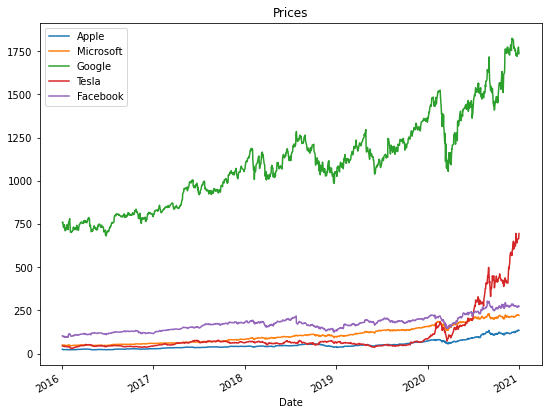

In [ ]:
stock_prices.plot(title='Prices', figsize=(9, 7))

Part 2.1. Rebased stock prices (6pt)

To make comparing and plotting different asset price series together easier, we often "rebase" all prices to a given initial value - e.g. 100.

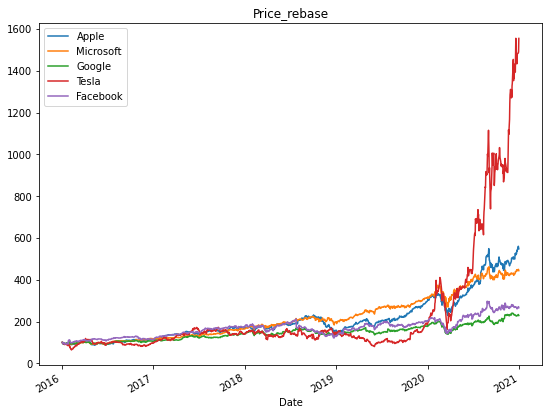

In [ ]:
stock_prices.rebase().plot(title='Price_rebase', figsize = (9,7))

# Part 3 Absolute return and risk measures [40pt]

3.1. Stock returns (6pt)
In asset management, we are often interested in the returns of a given time series. Therefore, in this part of the assignment, you need to compute daily, weekly, and monthly arithmetic and logarithmic returns for each chosen stock and store them in separate pandas dataframe objects named returns and log_returns, respectively.

Arithmetic return

In [ ]:
stock_prices
weekly_prices = stock_prices.resample('W').ffill()
month_prices = stock_prices.resample('M').ffill()

In [ ]:
daily_return = stock_prices.pct_change().dropna()
weekly_return = weekly_prices.pct_change().dropna()
monthly_return = month_prices.pct_change().dropna()

returns = [(daily_return, 'By_Day'), (weekly_prices, 'By_Week'), (monthly_return, 'by_Month')]
for x, y in returns:
  print(y)
  print(x.head())

By_Day
               Apple  Microsoft    Google     Tesla  Facebook
Date                                                         
2016-01-05 -0.025059   0.004562  0.002752  0.000090  0.004989
2016-01-06 -0.019570  -0.018165 -0.002889 -0.019648  0.002336
2016-01-07 -0.042205  -0.034783 -0.024140 -0.015477 -0.049043
2016-01-08  0.005288   0.003067 -0.013617 -0.021563 -0.006025
2016-01-11  0.016193  -0.000573  0.002955 -0.014929  0.001849
By_Week
                Apple  Microsoft      Google      Tesla    Facebook
Date                                                               
2016-01-10  22.424154  47.643063  730.909973  42.200001   97.330002
2016-01-17  22.463472  46.423088  710.489990  40.998001   94.970001
2016-01-24  23.455633  47.606640  745.460022  40.509998   97.940002
2016-01-31  22.512041  50.155861  761.349976  38.240002  112.209999
2016-02-07  21.862209  45.667427  703.760010  32.520000  104.070000
by_Month
               Apple  Microsoft    Google     Tesla  Facebook
Date

Log return

In [ ]:
daily_log = np.log(stock_prices/stock_prices.shift(1)).dropna()
weekly_log = np.log(weekly_prices/weekly_prices.shift(1)).dropna()
monthly_log = np.log(month_prices/month_prices.shift(1)).dropna()

log_returns = [(daily_log, 'By_Day'), (weekly_log, 'By_Week'), (monthly_log, 'By_Month')]
for x, y in log_returns:
  print(y)
  print(x.head())

By_Day
               Apple  Microsoft    Google     Tesla  Facebook
Date                                                         
2016-01-05 -0.025379   0.004552  0.002748  0.000090  0.004977
2016-01-06 -0.019764  -0.018332 -0.002893 -0.019844  0.002333
2016-01-07 -0.043121  -0.035402 -0.024436 -0.015598 -0.050287
2016-01-08  0.005274   0.003062 -0.013710 -0.021799 -0.006044
2016-01-11  0.016063  -0.000574  0.002951 -0.015041  0.001848
By_Week
               Apple  Microsoft    Google     Tesla  Facebook
Date                                                         
2016-01-17  0.001752  -0.025940 -0.028335 -0.028897 -0.024546
2016-01-24  0.043220   0.025175  0.048047 -0.011974  0.030794
2016-01-31 -0.041060   0.052163  0.021092 -0.057667  0.136017
2016-02-07 -0.029291  -0.093750 -0.078656 -0.162027 -0.075308
2016-02-14 -0.000319   0.006755  0.004438 -0.073749 -0.019993
By_Month
               Apple  Microsoft    Google     Tesla  Facebook
Date                                          

# 3.2. Distribution of returns (5pt)

Check what the return distributions look like by plotting a histogram of daily returns calculated in the previous section. You can use any Python visualisation library of your choice.

Plot returns distributions for both, arithmetic and logarithmic returns. Discuss whether there are significant differences between the two. Also, provide a short explanation on when and why we use log returns, rather than normal returns.

Histogram log returns

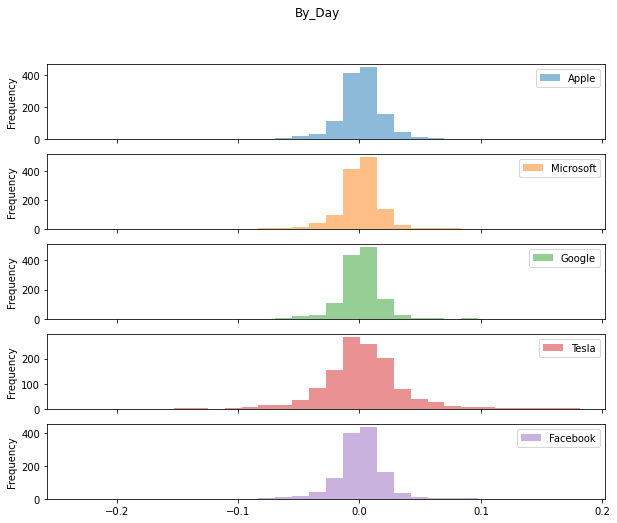

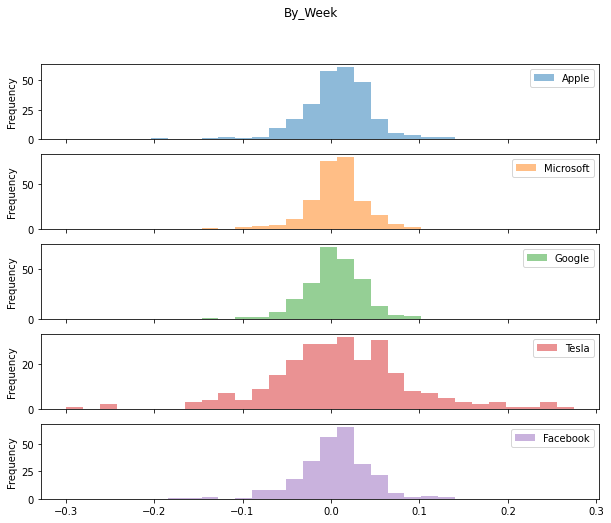

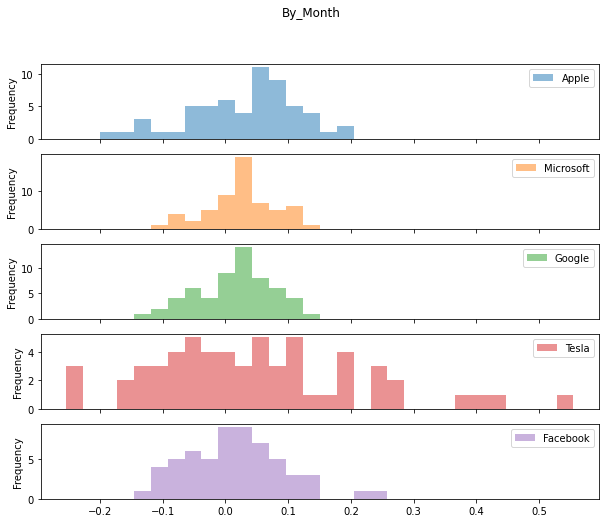

In [ ]:
for x, y in log_returns:
  x.plot.hist(subplots = True, title=y, figsize=(10, 8), legend=True, bins=30, alpha=0.5)

Histogram Returns :

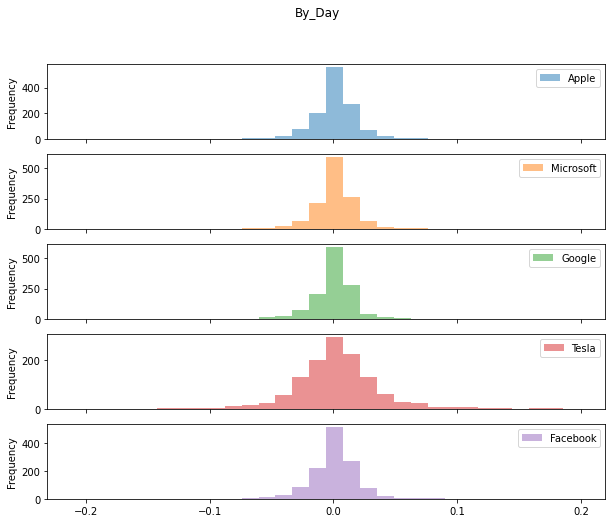

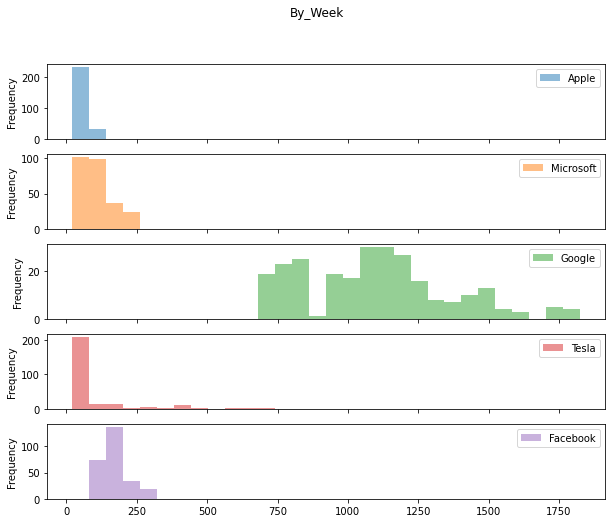

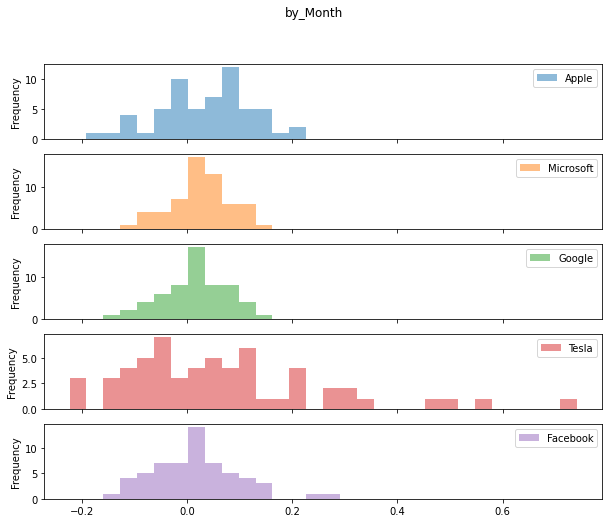

In [ ]:
for x, y in returns:
  x.plot.hist(subplots = True, title=y, figsize=(10, 8), legend=True, bins=30, alpha=0.5)


[Réponse]

Difference between returns and log returns : 



*   The distribution of returns seems to be less normal than the log return distribution. 
*   Using log return over return allow to assume that the sample of data is normally distributed and harmonized into a log function. Therefore, even if returns are very small and similaire it allows to construct some standard distribution (Bell Curv) and make analyse out of it.

The current situation is a great example, given that the standard return seems to be abnormal it would be very difficult to create model out of it. On contrary, the log return seems to be suitable for modeling (Machine Learning etc.)




# 3.3. Correlation matrix (5pt)

Using daily arithmetic stock returns, compute pairwise correlations between your 5 assets and plot a correlation matrix.

In [ ]:
daily_return.corr()

,Apple,Microsoft,Google,Tesla,Facebook
Apple,1.000000,0.713980,0.655497,0.385354,0.580680
Microsoft,0.713980,1.000000,0.782405,0.409345,0.632137
Google,0.655497,0.782405,1.000000,0.363153,0.693208
Tesla,0.385354,0.409345,0.363153,1.000000,0.324026
Facebook,0.580680,0.632137,0.693208,0.324026,1.000000


#3.4. Cumulative returns (8pt)
Using the arithmetic daily returns, compute cumulative returns for each stock over the last 1–, 3-, and 5- year periods and display them as values. Once done, annualise the resulting cumulative daily returns for each stock and display them as well.

In [ ]:
data = [('2016-01-01', '5-year'), ('2018-01-01', '3-year'), ('2020-01-01', '1-year')]

for date, period in data:
  comp_returns = (daily_return[(daily_return.index>=date)]+1).prod()-1
  print(period)
  print(comp_returns)

5-year
Apple         4.480116
Microsoft     3.433002
Google        1.286224
Tesla        14.549439
Facebook      1.659656
dtype: float64
3-year
Apple         2.284445
Microsoft     1.703722
Google        0.648234
Tesla        10.157540
Facebook      0.540689
dtype: float64
1-year
Apple        0.837219
Microsoft    0.420598
Google       0.296299
Tesla        7.304210
Facebook     0.324580
dtype: float64


In [ ]:
data2 = [('2016-01-01', 5, '5-year'), ('2018-01-01', 3, '3-year'), ('2020-01-01', 1, '1-year')]

for date, years, period in data2:
  comp_returns = (daily_return[(daily_return.index>=date)]+1).prod()-1
  annualized_return = comp_returns**(1/years)
  print(period)
  print(annualized_return)

5-year
Apple        1.349764
Microsoft    1.279778
Google       1.051631
Tesla        1.708320
Facebook     1.106633
dtype: float64
3-year
Apple        1.317024
Microsoft    1.194354
Google       0.865454
Tesla        2.165689
Facebook     0.814671
dtype: float64
1-year
Apple        0.837219
Microsoft    0.420598
Google       0.296299
Tesla        7.304210
Facebook     0.324580
dtype: float64


#3.5. Arithmetic average returns (8pt)

Compute arithmetic average daily returns for each stock, annualise them, and display the resulting values. 

In [ ]:
(1+daily_return.mean())**252-1

# 3.6. Standard deviation (8pt)
Using the stock returns calculated earlier, compute standard deviations of daily returns for each stock over the last 1–, 3-, and 5- year periods and display them.

Once done, repeat the calculation of standard deviations but using monthly returns instead. Display the resulting values.

Explain what the best way to annualise standard deviations is.

In [146]:
for date, period in data:
  print(period)
  print('daily', daily_return[(daily_return.index>=date)].std(), sep="\n")
  print('monthly', monthly_return[(monthly_return.index>=date)].std(), sep="\n")

5-year
daily
Apple        0.019415
Microsoft    0.017488
Google       0.016596
Tesla        0.036414
Facebook     0.020761
dtype: float64
monthly
Apple        0.086795
Microsoft    0.053051
Google       0.062632
Tesla        0.191639
Facebook     0.081186
dtype: float64
3-year
daily
Apple        0.022605
Microsoft    0.020314
Google       0.019371
Tesla        0.042986
Facebook     0.023961
dtype: float64
monthly
Apple        0.098365
Microsoft    0.055722
Google       0.070120
Tesla        0.232467
Facebook     0.095883
dtype: float64
1-year
daily
Apple        0.029764
Microsoft    0.027699
Google       0.024272
Tesla        0.056366
Facebook     0.028970
dtype: float64
monthly
Apple        0.115344
Microsoft    0.067364
Google       0.089419
Tesla        0.303235
Facebook     0.106404
dtype: float64


[Réponse]

The best way to annualized standard deviation would be to use this formula : 

*Annualized Standard Deviation = Standard Deviation of Daily Returns * Square Root (250)*

-> 250 for the number of day traded



#Part 4: Risk-adjusted performance evaluation [40pt]

As part of the course we considered several risk-adjusted performance evaluation measures. In this section of the assignment you are asked to compute one of them - the Sharpe ratio:

### Part 4.1. Calculating the Sharpe measure [10pt]

Using previously calculated monthly stock returns and the corresponding risk-free interest rates, compute Sharpe ratios for your selected stocks for the last 1-, 3-, and 5-years. Annualise the calculated Sharpe measures and report them as values.

Market excess return

In [143]:
URL_One_year_T_bill =  "https://raw.githubusercontent.com/Gakpe/TBS_investment_management/main/DTB1YR.csv"
URL_Three_Year_T_Bill = "https://raw.githubusercontent.com/Gakpe/TBS_investment_management/main/DGS3.csv"
URL_Five_year_T_Bill = "https://raw.githubusercontent.com/Gakpe/TBS_investment_management/main/DGS5.csv"

rf_One = pd.read_csv(URL_One_year_T_bill, index_col=['DATE'])
rf_Three = pd.read_csv(URL_Three_Year_T_Bill, index_col=['DATE'])
rf_Five = pd.read_csv(URL_Five_year_T_Bill, index_col=['DATE'])

rf_One
rf_One_adjusted = rf_One[(rf_One.index == '2020-01-02')]
value = rf_One_adjusted.loc['2020-01-02', 'DTB1YR']
value = float(value) - 1
value



0.52

In [145]:
comp_returns = (daily_return[(daily_return.index>='2020-01-01')]+1).prod()-1
One_annualized_return = comp_returns**(1/years)
One_excess_return = One_annualized_return - value
One_excess_return


Apple        0.263580
Microsoft    0.420598
Google       0.296299
Tesla        7.304210
Facebook     0.324580
dtype: float64

Colab Link: https://colab.research.google.com/drive/1fuy5MXU4JuQmn84MRWFWRQnQRsJ9jbFA#scrollTo=kV5_G4FusIwo